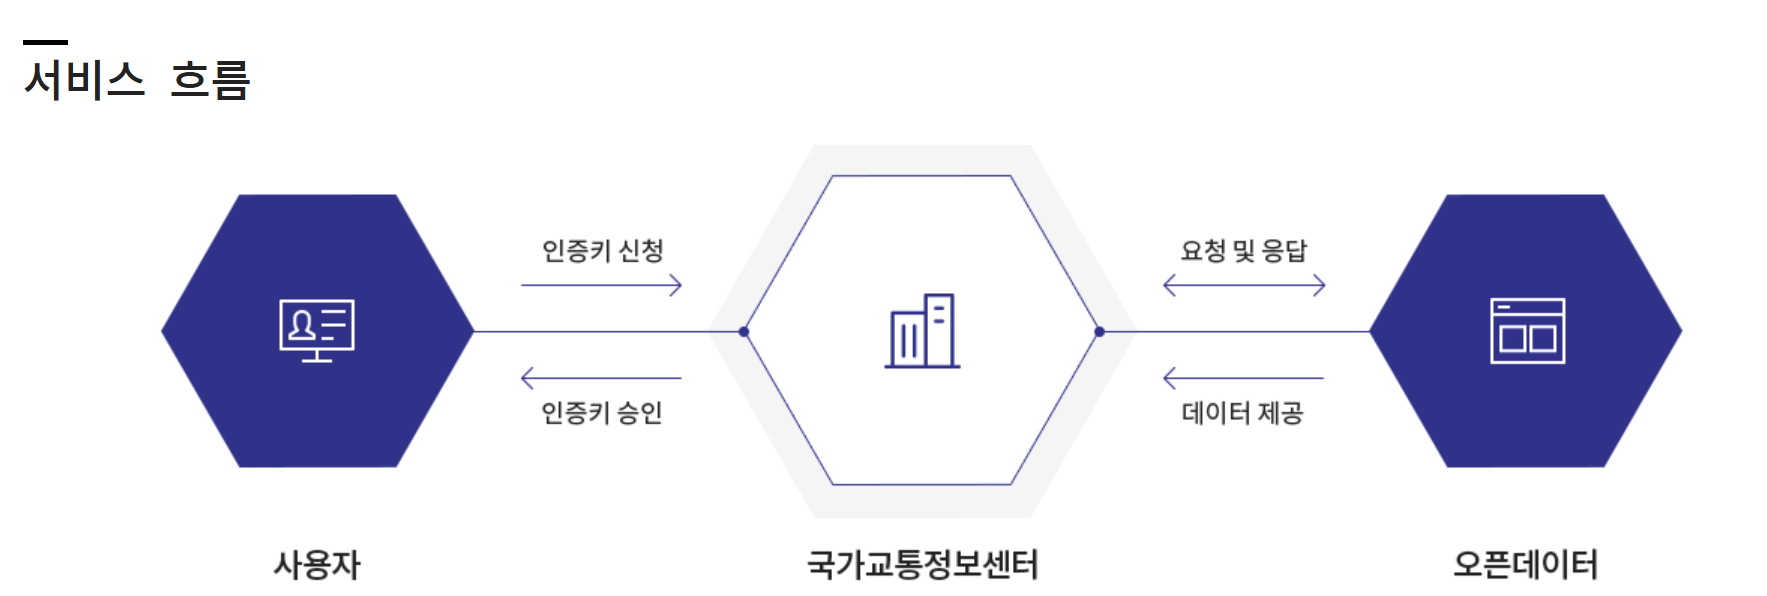

In [1]:
# OpenAPI 설명
from IPython.display import Image, display
explain = "C:/Users/DSU/Desktop/kdt/v05_openapi/api.png"
display(Image(filename=explain))

In [2]:
# 필요한 모듈 불러오기
import urllib
import json
import pandas as pd
import cv2

In [3]:
# 1. Open API 인증키 (발급받은 받은 키를 입력)
key = "db5c00dc1fce45c49049bff225a0fea6"

In [4]:
# 2. 도로 유형 (its : 일반 도로, ex : 고속도로)
Type = "its"

In [5]:
# 3. CCTV 데이터 요청을 위한 지리적 범위 설정(경도, 위도)
minX = float(120.95)
maxX = float(127.02)
minY = float(30.55)
maxY = float(37.69)


In [6]:
# 4. 응답 데이터 포맷 (json 또는 xml 가능)
getType = "json"

In [7]:
# 5. 위에서 설정한 값들을 조합하여 CCTV 정보 요청용 URL 생성
url_cctv = f"https://openapi.its.go.kr:9443/cctvInfo?apiKey={key}&type={Type}&cctvType=1&minX={minX}&maxX={maxX}&minY={minY}&maxY={maxY}&getType={getType}"

In [8]:
# 6. 생성한 URL로 API 요청 후 응답
response = urllib.request.urlopen(url_cctv)
# => 해당 URL로 GET 요청 보내고 서버 응답 받음!!

In [9]:
print(response)

In [10]:
# 7. 응답 받은 데이터를 utf-8형태로 변환
json_str = response.read().decode("utf-8")
# => byte 형태로 받은 응답을 UTF-8 문자열로 변환

In [11]:
# 8. JSON 문자열을 파이썬 딕셔너리로 변환
json_object = json.loads(json_str)

In [12]:
print(json_object)

{'response': {'coordtype': 1, 'data': [{'roadsectionid': '', 'coordx': 126.61283, 'coordy': 36.36643, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도 21호선] 보령 봉황터널시점', 'cctvurl': 'http://cctvsec.ktict.co.kr/4107/YVJDetuWhH2gGuhzsUBWwJke83GSfQnSZrSa+3kEJS1xmMFFwFW5ohwHwyezBDSnnAVqruPhz4ppoMGsdu1le75qeei8DViCUS9gwOi7BaM='}, {'roadsectionid': '', 'coordx': 126.59544, 'coordy': 36.37853, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도 21호선] 보령 봉황터널종점', 'cctvurl': 'http://cctvsec.ktict.co.kr/4108/uEw2V7VUiudn1PsEoqH2s6DPNMx0CC1Hcz8nG8xHkDCJtZLWOiA4CZsmLDQeRbsGRQMYofBIHvdVQzsSJ+Q+rls9d6NC3lsYibvsSIIyT5E='}, {'roadsectionid': '', 'coordx': 126.617068, 'coordy': 36.506767, 'cctvresolution': '', 'filecreatetime': '', 'cctvtype': 1, 'cctvformat': 'HLS', 'cctvname': '[국도 21호선] 홍성 단아래사거리', 'cctvurl': 'http://cctvsec.ktict.co.kr/4109/XIgVIAd5Mc+EOXn7+RNsFgyiUJSAA609pgX3G4KT80Um0XiI+KRzZVVPLLnr3eWHfdD8o

In [15]:
# 9. pandas DataFrame으로 변환
cctv_play = pd.json_normalize(json_object["response"]["data"], sep='')
# => 쉽게 분석하거나 필터링!!

In [ ]:
print(cctv_play["cctvurl"])

In [18]:
print(cctv_play['cctvname'])

0       [국도 21호선] 보령 봉황터널시점
1       [국도 21호선] 보령 봉황터널종점
2       [국도 21호선] 홍성 단아래사거리
3        [국도 29호선] 서산 석림사거리
4        [국도 29호선] 홍성 갈산교차로
               ...         
1110        [국도36] 보령 고잠교차로
1111        [국도77] 보령 원산교차로
1112        [국도77] 보령 원의교차로
1113        [국도77] 보령 선촌교차로
1114        [국도77] 태안 영목교차로
Name: cctvname, Length: 1115, dtype: object


In [19]:
test_url = cctv_play['cctvurl'][1114]

In [20]:
# 비디오 경로 설정
cap = cv2.VideoCapture(test_url)

In [ ]:
# 비디오 프레임 처리
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        print("비디오 경로 없음")
        break
    
    # 영상 창 조절
    cv2.namedWindow("OPENAPI", cv2.WINDOW_NORMAL)
    # 영상 창 출력
    cv2.imshow("OPENAPI", frame)
    # q 키 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print('q키 눌러서 종료')
        break
    
cap.release()
cv2.destroyAllWindows()